<a href="https://colab.research.google.com/github/entelecheia/ekorpkit-config/blob/main/notebooks/sentiment/financial_phrasebank_lm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/entelecheia/ekorpkit-config/blob/main/notebooks/sentiment/financial_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis

In [1]:
%%capture
%pip install ekorpkit[model,tokenize,dataset]==0.1.25.post0.dev5

## Prepare `financial_phrasebank` dataset

In [6]:
from ekorpkit import eKonf

cfg = eKonf.compose(config_group='dataset/simple=financial_phrasebank')

# cfg.data_dir = "${cached_path:gd://15TUjIfQstCYXU82s0pcaxh2QcSWf1zyG:financial_phrasebank.zip,true}"
# print(cfg.data_dir)
cfg.data_dir = './data/financial_phrasebank'
cfg.fetch.data_dir = cfg.data_dir
db = eKonf.instantiate(cfg)
db.build()

InstantiationException: ignored

## Compose a config for the LM sentiment analyser class

In [4]:
from ekorpkit import eKonf

config_group='model/sentiment=lm'
model_cfg = eKonf.compose(config_group=config_group)
model_cfg.preprocessor.tokenizer.nltk.lemmatize = True

## Instantiating a sentiment analyser class with `financial_phrasebank` dataset

In [7]:
ds_cfg = eKonf.compose(config_group='dataset=dataset')
ds_cfg.name = 'financial_phrasebank'
ds_cfg.data_dir = './data'

cfg = eKonf.compose(config_group='pipeline=pipeline')
cfg.verbose = True
cfg.dataset = ds_cfg
cfg._pipeline_ = ['predict']
cfg.predict.model = model_cfg
cfg.predict.output_dir = "./data/predict"
cfg.predict.output_file = f'{ds_cfg.name}.parquet'
cfg.num_workers = 1
df = eKonf.instantiate(cfg)
df

MissingConfigException: ignored

In [ ]:
print(cfg.predict.output_dir)
print(cfg.predict.output_file)

../data/predict
financial_phrasebank.parquet


Accuracy:  0.6418769366976538
Precison:  0.6332357082536276
Recall:  0.6418769366976538
F1 Score:  0.5976583790508804
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

    negative       0.38      0.36      0.37       303
     neutral       0.68      0.89      0.77      1386
    positive       0.65      0.19      0.29       570

    accuracy                           0.64      2259
   macro avg       0.57      0.48      0.48      2259
weighted avg       0.63      0.64      0.60      2259



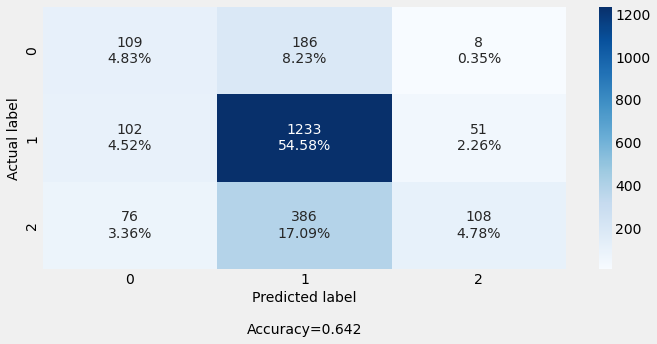

In [ ]:
eval_cfg = eKonf.compose(config_group='model/eval=classification')
eval_cfg.column_info.actual = 'labels'
eval_cfg.column_info.predicted = 'polarity_label'
eval_cfg.data_dir = '../data/predict'
eval_cfg.data_file = 'financial_phrasebank-*.parquet'
eval_cfg.output_dir = '../data/eval'
# eval_cfg.method.average = None
eKonf.instantiate(eval_cfg)

In [ ]:
eKonf.pprint(eval_cfg)

{'_target_': 'ekorpkit.models.eval.eval_classification',
 'column_info': {'actual': 'labels', 'predicted': 'polarity_label'},
 'data': None,
 'data_dir': '../data/predict',
 'data_file': 'financial_phrasebank.parquet',
 'method': {'_partial_': True,
            '_target_': 'ekorpkit.models.metrics.evaluate_classification_performance',
            'average': 'weighted'},
 'output_dir': '../data/eval',
 'output_file': 'confusion_matrix.png',
 'pipeline': {'data_dir': '../data/predict',
              'data_file': 'financial_phrasebank.parquet',
              'load_dataframe': {'data_dir': '../data/predict',
                                 'data_file': 'financial_phrasebank.parquet',
                                 'filepath': None,
                                 'filetype': None,
                                 'method': {'_partial_': True,
                                            '_target_': 'ekorpkit.pipelines.pipe._load_dataframe'},
                                 'verbose': T